# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [4]:
df = pd.read_csv('/content/Frozen_Dessert_Production.csv', index_col='DATE', 
                 parse_dates=True)

In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [8]:
df = df.rename(columns={'IPN31152N' : 'IceCream'})

In [9]:
df

,IceCream
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IceCream  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


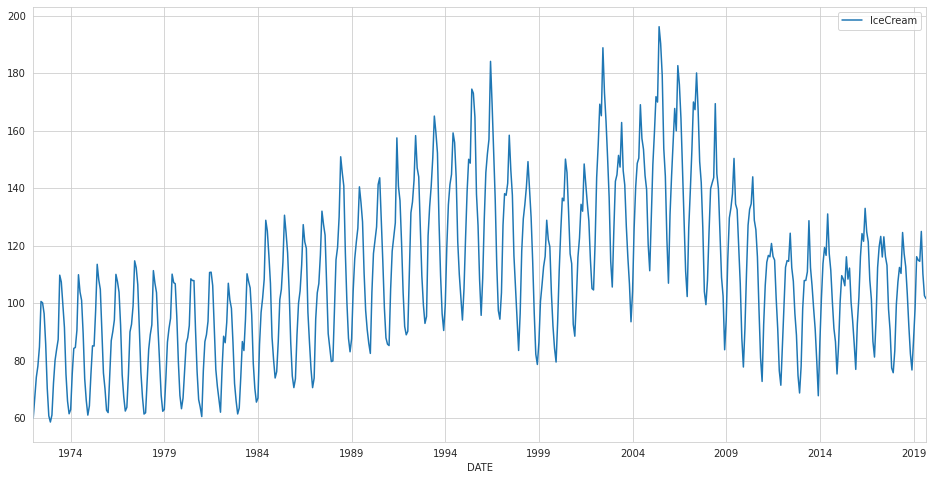

In [11]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [12]:
len(df)

573

In [13]:
test_size = 24

In [14]:
test_ind = len(df)- test_size
test_ind

549

In [15]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [16]:
train

,IceCream
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [17]:
test

,IceCream
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [23]:
len(generator)

537

In [24]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [25]:
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [43]:
n_features = train_scaled.shape[1]

In [44]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [46]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [47]:
len(validation_generator)

12

In [48]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator
                   )

Epoch 1/20
537/537 [==============================] - 11s 12ms/step - loss: 0.0204 - val_loss: 0.0018
Epoch 2/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 3/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 4/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 5/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 6/20
537/537 [==============================] - 8s 14ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 7/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 8/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 10/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0032 - val_los

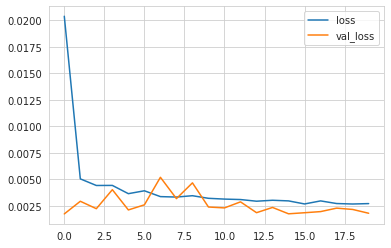

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

####Evaluate on Test Data

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [52]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))    

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [53]:
predictions_scaled

[array([0.22115225], dtype=float32),
 array([0.20372671], dtype=float32),
 array([0.23441568], dtype=float32),
 array([0.29358807], dtype=float32),
 array([0.3474096], dtype=float32),
 array([0.3874493], dtype=float32),
 array([0.4196802], dtype=float32),
 array([0.43871254], dtype=float32),
 array([0.43263403], dtype=float32),
 array([0.39236405], dtype=float32),
 array([0.32879817], dtype=float32),
 array([0.26114255], dtype=float32)]

In [54]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6698514864950069 
mae: 0.056991751016083725 
mse: 0.004117162860175087 
rmse: 0.06416512183558204


with EarlyStop

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
model_early = Sequential()
model_early.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model_early.add(LSTM(50, activation = 'tanh'))
model_early.add(Dense(1))
model_early.compile(optimizer = 'adam', loss = 'mse')

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [65]:
model_early.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 11s 11ms/step - loss: 0.0188 - val_loss: 0.0029
Epoch 2/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 3/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 4/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 5/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 6/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 7/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 9/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0031 - val_loss: 0.

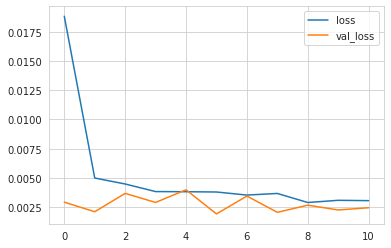

In [67]:
loss_df = pd.DataFrame(model_early.history.history)
loss_df.plot();

#### Evaluate on Test Data

In [68]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))    

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_early.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [69]:
predictions_scaled

[array([0.22639617], dtype=float32),
 array([0.18104291], dtype=float32),
 array([0.18982582], dtype=float32),
 array([0.24139261], dtype=float32),
 array([0.30125052], dtype=float32),
 array([0.35335255], dtype=float32),
 array([0.39726993], dtype=float32),
 array([0.4312398], dtype=float32),
 array([0.45235997], dtype=float32),
 array([0.44492012], dtype=float32),
 array([0.40747222], dtype=float32),
 array([0.3420167], dtype=float32)]

In [70]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.9016516618359294 
mae: 0.02668320481458032 
mse: 0.0012264666011980326 
rmse: 0.03502094517853612


#### Inverse Transformations and Comparing

In [83]:
predictions = scaler.inverse_transform(predictions_scaled)

In [84]:
compare = test[:12]

In [85]:
compare['Predictions'] = predictions

In [74]:
compare

,IceCream,Predictions
DATE,,
2017-10-01,90.473,89.792
2017-11-01,77.438,83.556
2017-12-01,75.812,84.763
2018-01-01,83.434,91.855
2018-02-01,99.490,100.086
2018-03-01,107.315,107.251
2018-04-01,112.431,113.290
2018-05-01,110.354,117.961
2018-06-01,124.584,120.866


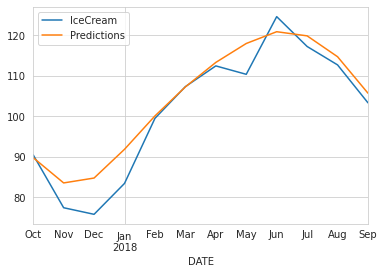

In [75]:
compare.plot();

#### Calculation R2 Score and Error Metrics

In [77]:
eval_metrics(compare.IceCream, compare.Predictions)

r2_score: 0.9016516618359296 
mae: 3.6693115585517107 
mse: 23.19257258444895 
rmse: 4.815866753186694


### with "relu" activation function

In [79]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 12, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 50)                30200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator
                    )

Epoch 1/20
537/537 [==============================] - 61s 108ms/step - loss: 0.0303 - val_loss: 0.0219
Epoch 2/20
537/537 [==============================] - 52s 97ms/step - loss: 0.0113 - val_loss: 0.0044
Epoch 3/20
537/537 [==============================] - 72s 135ms/step - loss: 0.0078 - val_loss: 0.0017
Epoch 4/20
537/537 [==============================] - 69s 128ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 5/20
537/537 [==============================] - 41s 76ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 6/20
537/537 [==============================] - 48s 90ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 7/20
537/537 [==============================] - 52s 96ms/step - loss: 0.0053 - val_loss: 0.0019
Epoch 8/20
537/537 [==============================] - 39s 73ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 9/20
537/537 [==============================] - 39s 73ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 10/20
537/537 [==============================] - 39s 73ms/step - loss: 0.

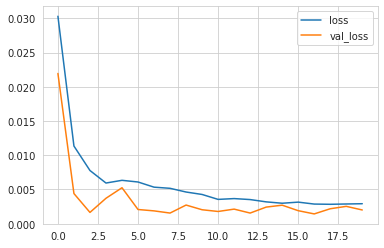

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [86]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))    

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [87]:
predictions_scaled

[array([0.2772372], dtype=float32),
 array([0.23901427], dtype=float32),
 array([0.24397728], dtype=float32),
 array([0.33787736], dtype=float32),
 array([0.42608765], dtype=float32),
 array([0.49112922], dtype=float32),
 array([0.5369522], dtype=float32),
 array([0.5541574], dtype=float32),
 array([0.53889805], dtype=float32),
 array([0.47782704], dtype=float32),
 array([0.39516258], dtype=float32),
 array([0.31009004], dtype=float32)]

In [88]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.019294914839944055 
mae: 0.09536547853606202 
mse: 0.012230018880108518 
rmse: 0.11058941576890854


with EarlyStop

In [98]:
model_early2 = Sequential()
model_early2.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_early2.add(LSTM(50, activation = 'relu'))
model_early2.add(Dense(1))
model_early2.compile(optimizer = 'adam', loss = 'mse')

In [99]:
model_early2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 12, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 50)                30200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [100]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [101]:
model_early2.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 42s 73ms/step - loss: 0.0305 - val_loss: 0.0080
Epoch 2/20
537/537 [==============================] - 39s 73ms/step - loss: 0.0150 - val_loss: 0.0145
Epoch 3/20
537/537 [==============================] - 39s 72ms/step - loss: 0.0079 - val_loss: 0.0013
Epoch 4/20
537/537 [==============================] - 61s 113ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 5/20
537/537 [==============================] - 46s 86ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 6/20
537/537 [==============================] - 39s 73ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 7/20
537/537 [==============================] - 40s 74ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 8/20
537/537 [==============================] - 39s 73ms/step - loss: 0.0050 - val_loss: 0.0017


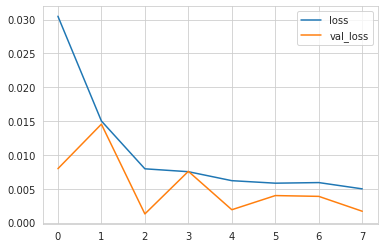

In [102]:
loss_df = pd.DataFrame(model_early2.history.history)
loss_df.plot()

Evaluate on Test Data

In [103]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))    

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_early2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [104]:
predictions_scaled

[array([0.2735113], dtype=float32),
 array([0.18388069], dtype=float32),
 array([0.18113637], dtype=float32),
 array([0.2799841], dtype=float32),
 array([0.36601976], dtype=float32),
 array([0.41591296], dtype=float32),
 array([0.426817], dtype=float32),
 array([0.44085506], dtype=float32),
 array([0.45312518], dtype=float32),
 array([0.42988542], dtype=float32),
 array([0.3753485], dtype=float32),
 array([0.30501533], dtype=float32)]

In [105]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7815397444038458 
mae: 0.04542579425374815 
mse: 0.002724338938304019 
rmse: 0.05219520033780902


#### Inverse Transformations and Comparing

In [106]:
predictions = scaler.inverse_transform(predictions_scaled)

In [107]:
compare = test[:12]

In [108]:
compare['Predictions'] = predictions

In [109]:
compare

,IceCream,Predictions
DATE,,
2017-10-01,90.473,96.271
2017-11-01,77.438,83.946
2017-12-01,75.812,83.569
2018-01-01,83.434,97.162
2018-02-01,99.490,108.993
2018-03-01,107.315,115.854
2018-04-01,112.431,117.353
2018-05-01,110.354,119.283
2018-06-01,124.584,120.971


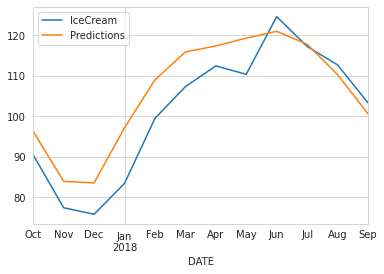

In [111]:
compare.plot();

#### Calculation R2 Score and Error Metrics

In [113]:
eval_metrics(compare.IceCream, compare.Predictions)

r2_score: 0.781539744403846 
mae: 6.246678128430493 
mse: 51.5174473642715 
rmse: 7.1775655597334325


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [132]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [133]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [134]:
len(df)

573

In [135]:
len(generator)

561

In [199]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=16)

Epoch 1/16
561/561 [==============================] - 8s 9ms/step - loss: 0.0209
Epoch 2/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0056
Epoch 3/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0043
Epoch 4/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0043
Epoch 5/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0040
Epoch 6/16
561/561 [==============================] - 5s 10ms/step - loss: 0.0042
Epoch 7/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0035
Epoch 8/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0038
Epoch 9/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0033
Epoch 10/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0031
Epoch 11/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0033
Epoch 12/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0031
Epoch 13/16
561/561 [===

In [200]:
scaled_full_data.shape

(573, 1)

In [201]:
scaled_full_data[-length:].shape

(12, 1)

In [202]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [203]:
forecast = scaler.inverse_transform(forecast)

In [204]:
forecast

array([[ 92.32423157],
       [ 88.63333986],
       [ 92.61150545],
       [100.46168826],
       [107.70459893],
       [113.60208409],
       [118.61703105],
       [122.24945121],
       [122.83799853],
       [119.24022484],
       [113.23250129],
       [106.52272164]])

In [205]:
df

,IceCream
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [206]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [207]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [208]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [209]:
forecast_df

,Forecast
2019-10-01,92.324
2019-11-01,88.633
2019-12-01,92.612
2020-01-01,100.462
2020-02-01,107.705
2020-03-01,113.602
2020-04-01,118.617
2020-05-01,122.249
2020-06-01,122.838
2020-07-01,119.240


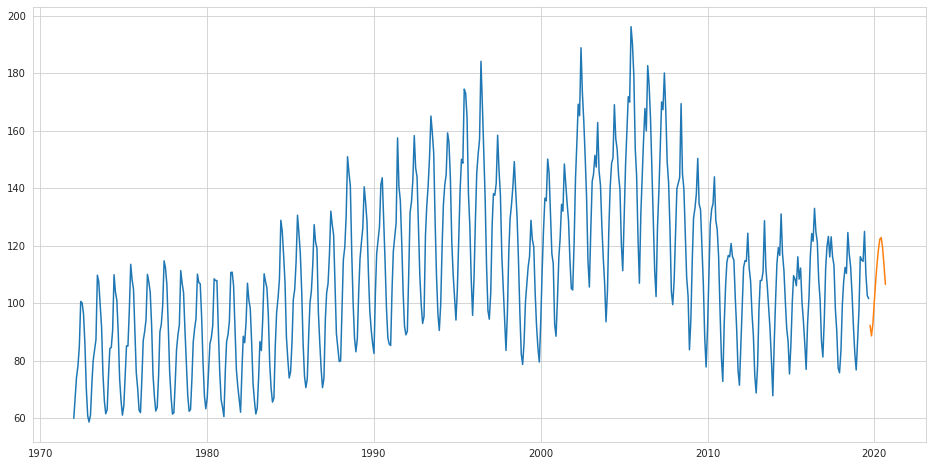

In [210]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['IceCream'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

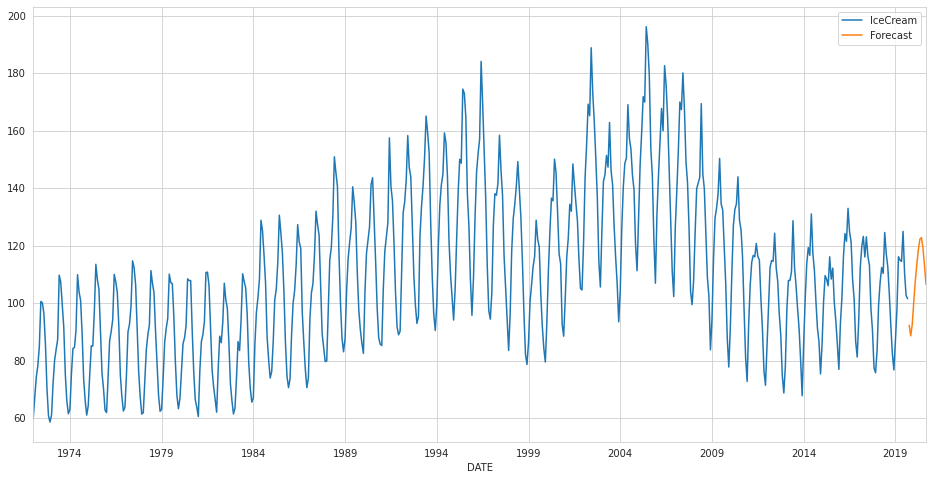

In [211]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(584.0, 608.0)

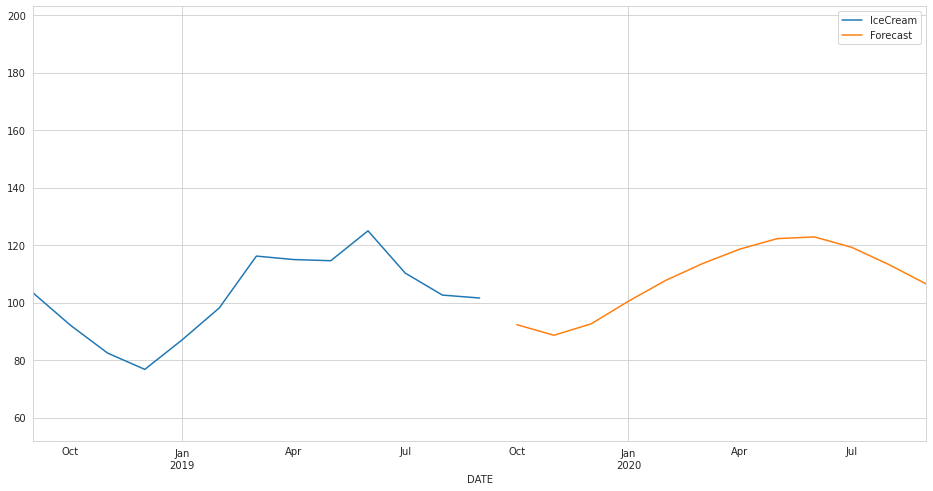

In [212]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-09-01', '2020-09-01')